In [45]:
from dotenv import load_dotenv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [ ]:
import sys
import os
sys.path.append(os.path.abspath('../scripts'))

In [ ]:
from load_data import load_data_from_postgres

In [48]:
# Load environment variables from .env file
load_dotenv()

# Fetch database connection parameters from environment variables
DB_HOST = os.getenv("DB_HOST")
DB_PORT = os.getenv("DB_PORT")
DB_NAME = os.getenv("DB_NAME")
DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")

In [49]:
# Define your SQL query
query = "SELECT * FROM xdr_data;"  # Replace with your actual table name

# Load data from PostgreSQL
df = load_data_from_postgres(query)

# Display the first few rows of the dataframe
if df is not None:
    print("Successfully loaded the data")
else:
    print("Failed to load data.")


d:\Projects\Telcom\scripts\load_data.py:38: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


Successfully loaded the data


In [50]:
df

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,1.311448e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [51]:
# Check dataset info and column names
print("Dataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns.tolist())
print("\nData Types:")
print(df.dtypes)
print("\nFirst few rows:")
print(df.head())

Dataset Shape: (150001, 55)

Column Names:
['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI', 'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer', 'Handset Type', 'Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 6250B < Vol UL < 37500B', 'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B', 'S

In [52]:
# Check for handset related columns
handset_cols = [col for col in df.columns if 'handset' in col.lower() or 'device' in col.lower()]
print("Handset related columns:", handset_cols)

# Check for application related columns
app_cols = [col for col in df.columns if any(app in col.lower() for app in ['social', 'google', 'email', 'youtube', 'netflix', 'gaming', 'other'])]
print("Application related columns:", app_cols)

# Show all columns more clearly
print("\nAll columns:")
for i, col in enumerate(df.columns):
    print(f"{i+1:2d}. {col}")

Handset related columns: ['Handset Manufacturer', 'Handset Type']
Application related columns: ['Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)']

All columns:
 1. Bearer Id
 2. Start
 3. Start ms
 4. End
 5. End ms
 6. Dur. (ms)
 7. IMSI
 8. MSISDN/Number
 9. IMEI
10. Last Location Name
11. Avg RTT DL (ms)
12. Avg RTT UL (ms)
13. Avg Bearer TP DL (kbps)
14. Avg Bearer TP UL (kbps)
15. TCP DL Retrans. Vol (Bytes)
16. TCP UL Retrans. Vol (Bytes)
17. DL TP < 50 Kbps (%)
18. 50 Kbps < DL TP < 250 Kbps (%)
19. 250 Kbps < DL TP < 1 Mbps (%)
20. DL TP > 1 Mbps (%)
21. UL TP < 10 Kbps (%)
22. 10 Kbps < UL TP < 50 Kbps (%)
23. 50 Kbps < UL TP < 300 Kbps (%)
24. UL TP > 300 Kbps (%)
25. HTTP DL (Bytes)
26. HTTP UL (Bytes)
27. Activity Duration

# User Overview Analysis - Telecom Dataset

This notebook provides a comprehensive analysis of telecom user behavior based on xDR (Extended Detail Record) data. The analysis covers handset usage, user behavior patterns, and data consumption across various applications.

## Dataset Overview
- **Total Records**: {df.shape[0]:,}
- **Total Features**: {df.shape[1]}
- **Key Applications**: Social Media, Google, Email, YouTube, Netflix, Gaming, Others

## Task 1: Handset Analysis

Top 10 Handsets Used by Customers:
 1. Huawei B528S-23A: 19,752 users (13.17%)
 2. Apple iPhone 6S (A1688): 9,419 users (6.28%)
 3. Apple iPhone 6 (A1586): 9,023 users (6.02%)
 4. undefined: 8,987 users (5.99%)
 5. Apple iPhone 7 (A1778): 6,326 users (4.22%)
 6. Apple iPhone Se (A1723): 5,187 users (3.46%)
 7. Apple iPhone 8 (A1905): 4,993 users (3.33%)
 8. Apple iPhone Xr (A2105): 4,568 users (3.05%)
 9. Samsung Galaxy S8 (Sm-G950F): 4,520 users (3.01%)
10. Apple iPhone X (A1901): 3,813 users (2.54%)


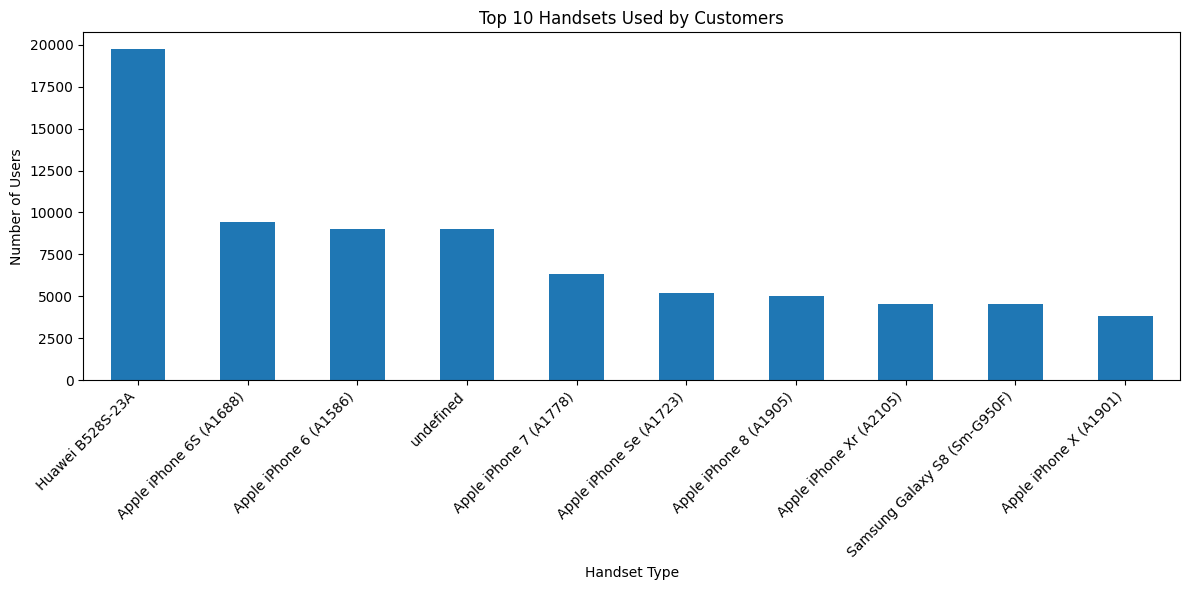

In [53]:
# Task 1.1: Top 10 Handsets Used by Customers
top_10_handsets = df['Handset Type'].value_counts().head(10)
print("Top 10 Handsets Used by Customers:")
print("="*50)
for i, (handset, count) in enumerate(top_10_handsets.items(), 1):
    print(f"{i:2d}. {handset}: {count:,} users ({count/len(df)*100:.2f}%)")
    
# Visualize top 10 handsets
plt.figure(figsize=(12, 6))
top_10_handsets.plot(kind='bar')
plt.title('Top 10 Handsets Used by Customers')
plt.xlabel('Handset Type')
plt.ylabel('Number of Users')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Top 3 Handset Manufacturers:
1. Apple: 59,565 users (39.71%)
2. Samsung: 40,839 users (27.23%)
3. Huawei: 34,423 users (22.95%)


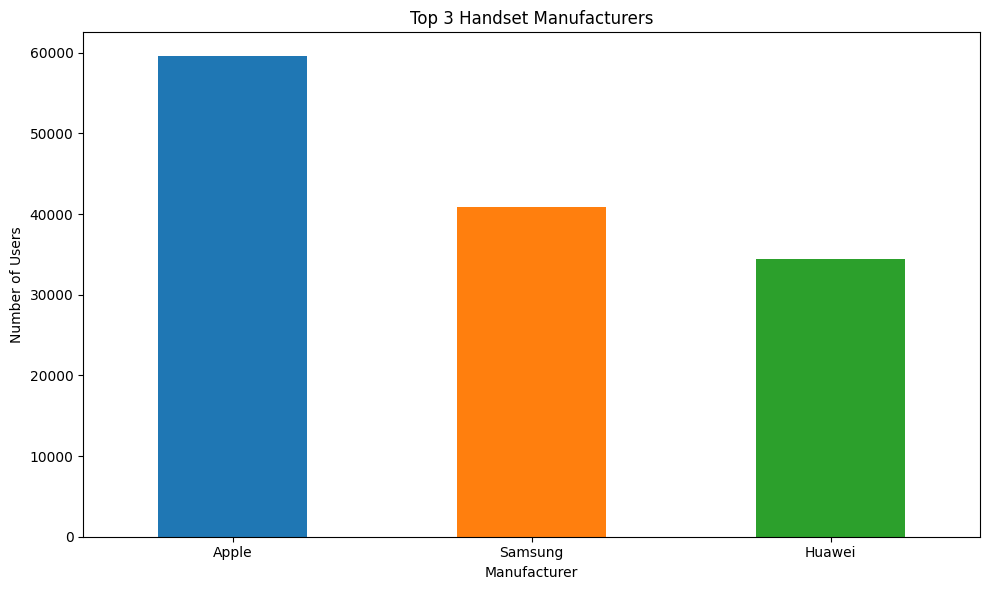

In [54]:
# Task 1.2: Top 3 Handset Manufacturers
top_3_manufacturers = df['Handset Manufacturer'].value_counts().head(3)
print("Top 3 Handset Manufacturers:")
print("="*40)
for i, (manufacturer, count) in enumerate(top_3_manufacturers.items(), 1):
    print(f"{i}. {manufacturer}: {count:,} users ({count/len(df)*100:.2f}%)")

# Visualize top 3 manufacturers
plt.figure(figsize=(10, 6))
top_3_manufacturers.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Top 3 Handset Manufacturers')
plt.xlabel('Manufacturer')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Top 5 Handsets per Top 3 Manufacturers:

Apple:
  1. Apple iPhone 6S (A1688): 9,419 users
  2. Apple iPhone 6 (A1586): 9,023 users
  3. Apple iPhone 7 (A1778): 6,326 users
  4. Apple iPhone Se (A1723): 5,187 users
  5. Apple iPhone 8 (A1905): 4,993 users

Samsung:
  1. Samsung Galaxy S8 (Sm-G950F): 4,520 users
  2. Samsung Galaxy A5 Sm-A520F: 3,724 users
  3. Samsung Galaxy J5 (Sm-J530): 3,696 users
  4. Samsung Galaxy J3 (Sm-J330): 3,484 users
  5. Samsung Galaxy S7 (Sm-G930X): 3,199 users

Huawei:
  1. Huawei B528S-23A: 19,752 users
  2. Huawei E5180: 2,079 users
  3. Huawei P20 Lite Huawei Nova 3E: 2,021 users
  4. Huawei P20: 1,480 users
  5. Huawei Y6 2018: 997 users


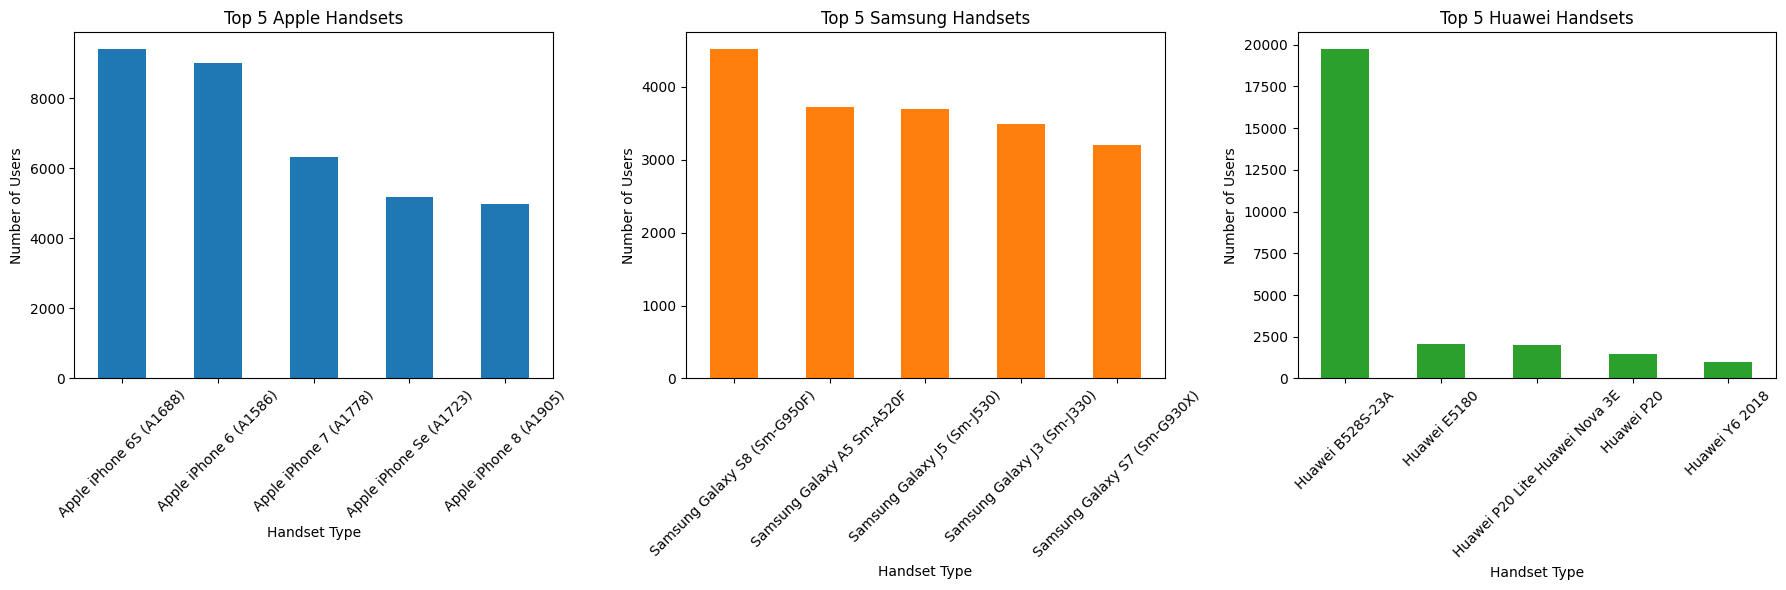

In [55]:
# Task 1.3: Top 5 Handsets per Top 3 Manufacturers
print("Top 5 Handsets per Top 3 Manufacturers:")
print("="*50)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, manufacturer in enumerate(['Apple', 'Samsung', 'Huawei']):
    manufacturer_data = df[df['Handset Manufacturer'] == manufacturer]
    top_5_handsets = manufacturer_data['Handset Type'].value_counts().head(5)
    
    print(f"\n{manufacturer}:")
    for j, (handset, count) in enumerate(top_5_handsets.items(), 1):
        print(f"  {j}. {handset}: {count:,} users")
    
    # Plot for each manufacturer
    top_5_handsets.plot(kind='bar', ax=axes[i], color=f'C{i}')
    axes[i].set_title(f'Top 5 {manufacturer} Handsets')
    axes[i].set_xlabel('Handset Type')
    axes[i].set_ylabel('Number of Users')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Marketing Insights and Recommendations:

**Key Findings:**
1. **Apple dominates** the market with 39.71% share, followed by Samsung (27.23%) and Huawei (22.95%)
2. **Huawei B528S-23A** is the most popular single device (13.17% of all users)
3. **iPhone 6S and 6** remain highly popular despite being older models
4. **Samsung Galaxy S8** leads Samsung's portfolio with 4,520 users

**Recommendations for Marketing Teams:**
1. **Focus on Apple users** - They represent the largest segment and likely have higher spending power
2. **Target iPhone upgrade campaigns** - Many users still on iPhone 6/6S could be targeted for newer models
3. **Samsung strategy** - Leverage Galaxy S8 popularity to promote newer Galaxy S series
4. **Huawei opportunity** - The B528S-23A dominance suggests strong router/modem usage - explore data plan bundles
5. **Device-specific promotions** - Create targeted campaigns for top handsets in each manufacturer category

## Task 1.1: User Behavior Overview Analysis

This section analyzes user behavior across different applications including Social Media, Google, Email, YouTube, Netflix, Gaming, and Others.

In [58]:
# User Behavior Aggregation per User
print("Checking application columns...")
# Get actual application column names from the dataset
app_cols = [col for col in df.columns if any(app in col for app in ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other'])]
print("Application columns found:", app_cols)

print("\nAggregating user data...")

# Create basic aggregation per user
user_basic_data = df.groupby('MSISDN/Number').agg({
    'Bearer Id': 'count',  # Number of xDR sessions
    'Dur. (ms)': 'sum',    # Total session duration
    'Total DL (Bytes)': 'sum',  # Total download data
    'Total UL (Bytes)': 'sum'   # Total upload data
}).reset_index()

# Rename columns for clarity
user_basic_data.columns = ['user_id', 'xDR_sessions', 'total_duration', 'total_DL', 'total_UL']

# Add total data volume
user_basic_data['total_data_volume'] = user_basic_data['total_DL'] + user_basic_data['total_UL']

# Create application-specific aggregation using actual column names
app_agg_dict = {}
for col in app_cols:
    app_agg_dict[col] = 'sum'

# Aggregate application data per user
user_app_agg = df.groupby('MSISDN/Number').agg(app_agg_dict).reset_index()
user_app_agg.columns = ['user_id'] + [col for col in user_app_agg.columns[1:]]

# Calculate total data per application
applications = ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']
for app in applications:
    dl_col = f'{app} DL (Bytes)'
    ul_col = f'{app} UL (Bytes)'
    if dl_col in user_app_agg.columns and ul_col in user_app_agg.columns:
        user_app_agg[f'{app.replace(" ", "_")}_total'] = user_app_agg[dl_col] + user_app_agg[ul_col]

# Merge basic and application data
user_app_data = user_basic_data.merge(user_app_agg, on='user_id', how='left')

print(f"Successfully aggregated data for {len(user_app_data)} users")
print(f"Dataset shape: {user_app_data.shape}")

# Display first few rows and column names
print("\nColumn names:")
print(user_app_data.columns.tolist())
print("\nFirst 5 rows of aggregated user data:")
user_app_data.head()

Checking application columns...
Application columns found: ['Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)']

Aggregating user data...
Successfully aggregated data for 106856 users
Dataset shape: (106856, 27)

Column names:
['user_id', 'xDR_sessions', 'total_duration', 'total_DL', 'total_UL', 'total_data_volume', 'Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)', 'Social_Media_total', 'Google_total', 'Email_total', 'Youtube_total', 'Netflix_total', 'Gaming_total', 'Other_total']

Fir

,user_id,xDR_sessions,total_duration,total_DL,total_UL,total_data_volume,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),...,Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Social_Media_total,Google_total,Email_total,Youtube_total,Netflix_total,Gaming_total,Other_total
0,3.360100e+10,1,116720.0,8.426375e+08,36053108.0,8.786906e+08,2206504.0,25631.0,3337123.0,1051882.0,...,1367528.0,377096990.0,9473882.0,2232135.0,4389005.0,1331362.0,21624548.0,27180981.0,8.124587e+08,386570872.0
1,3.360100e+10,1,181230.0,1.207552e+08,36104459.0,1.568596e+08,2598548.0,62017.0,4197697.0,1137166.0,...,14714780.0,279557701.0,2152370.0,2660565.0,5334863.0,3307781.0,12432223.0,11221763.0,1.197501e+08,281710071.0
2,3.360100e+10,1,134969.0,5.566597e+08,39306820.0,5.959665e+08,3148004.0,47619.0,3343483.0,99643.0,...,9759228.0,495086501.0,6607171.0,3195623.0,3443126.0,3205380.0,21333570.0,19353900.0,5.388277e+08,501693672.0
3,3.360101e+10,1,49878.0,4.019932e+08,20327526.0,4.223207e+08,251469.0,28825.0,5937765.0,3740728.0,...,3051292.0,25248001.0,10031701.0,280294.0,9678493.0,2284670.0,6977321.0,1942092.0,3.911261e+08,35279702.0
4,3.360101e+10,2,37104.0,1.363130e+09,94280527.0,1.457411e+09,2861230.0,51312.0,13728668.0,4770948.0,...,5816727.0,777643713.0,27160771.0,2912542.0,18499616.0,3305469.0,41533002.0,49201724.0,1.314798e+09,804804484.0


## Task 1.2: Exploratory Data Analysis & Data Cleaning

In [59]:
# 1. Data Types and Variable Description
print("=== DATASET OVERVIEW ===")
print(f"Original Dataset Shape: {df.shape}")
print(f"User Aggregated Dataset Shape: {user_app_data.shape}")
print(f"Total Users: {len(user_app_data):,}")

print("\n=== DATA TYPES ===")
print("Quantitative Variables (Continuous):")
quantitative_vars = ['xDR_sessions', 'total_duration', 'total_DL', 'total_UL', 'total_data_volume']
quantitative_vars.extend([col for col in user_app_data.columns if col.endswith('_total') or col.endswith('(Bytes)')])

for var in quantitative_vars:
    if var in user_app_data.columns:
        dtype = user_app_data[var].dtype
        print(f"  - {var}: {dtype}")

print("\nCategorical Variables:")
categorical_vars = ['Handset Type', 'Handset Manufacturer']
for var in categorical_vars:
    if var in df.columns:
        unique_count = df[var].nunique()
        print(f"  - {var}: {unique_count} unique values")

print("\n=== MISSING VALUES ANALYSIS ===")
missing_summary = user_app_data.isnull().sum()
missing_pct = (missing_summary / len(user_app_data) * 100).round(2)
missing_df = pd.DataFrame({
    'Missing Count': missing_summary,
    'Missing Percentage': missing_pct
}).sort_values('Missing Count', ascending=False)

print(missing_df[missing_df['Missing Count'] > 0])

=== DATASET OVERVIEW ===
Original Dataset Shape: (150001, 55)
User Aggregated Dataset Shape: (106856, 27)
Total Users: 106,856

=== DATA TYPES ===
Quantitative Variables (Continuous):
  - xDR_sessions: int64
  - total_duration: float64
  - total_DL: float64
  - total_UL: float64
  - total_data_volume: float64
  - Social Media DL (Bytes): float64
  - Social Media UL (Bytes): float64
  - Google DL (Bytes): float64
  - Google UL (Bytes): float64
  - Email DL (Bytes): float64
  - Email UL (Bytes): float64
  - Youtube DL (Bytes): float64
  - Youtube UL (Bytes): float64
  - Netflix DL (Bytes): float64
  - Netflix UL (Bytes): float64
  - Gaming DL (Bytes): float64
  - Gaming UL (Bytes): float64
  - Other DL (Bytes): float64
  - Other UL (Bytes): float64
  - Social_Media_total: float64
  - Google_total: float64
  - Email_total: float64
  - Youtube_total: float64
  - Netflix_total: float64
  - Gaming_total: float64
  - Other_total: float64

Categorical Variables:
  - Handset Type: 1396 unique v

In [60]:
# 2. Handle Missing Values and Outliers
print("=== OUTLIER DETECTION AND TREATMENT ===")

# Define key numerical columns for outlier analysis
key_columns = ['total_duration', 'total_DL', 'total_UL', 'total_data_volume']
app_total_columns = [col for col in user_app_data.columns if col.endswith('_total')]

# Store original statistics
print("Before outlier treatment:")
print(user_app_data[key_columns].describe())

# Apply outlier treatment using IQR method
def treat_outliers_iqr(df, columns):
    df_cleaned = df.copy()
    outlier_summary = {}
    
    for col in columns:
        if col in df.columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Count outliers
            outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
            outlier_summary[col] = {
                'outliers_count': outliers,
                'outliers_pct': (outliers / len(df) * 100).round(2)
            }
            
            # Cap outliers
            df_cleaned[col] = np.clip(df[col], lower_bound, upper_bound)
    
    return df_cleaned, outlier_summary

# Apply outlier treatment
user_data_cleaned, outlier_info = treat_outliers_iqr(user_app_data, key_columns + app_total_columns)

print(f"\nOutlier Summary:")
for col, info in outlier_info.items():
    if info['outliers_count'] > 0:
        print(f"  {col}: {info['outliers_count']} outliers ({info['outliers_pct']}%)")

print(f"\nAfter outlier treatment:")
print(user_data_cleaned[key_columns].describe())

=== OUTLIER DETECTION AND TREATMENT ===
Before outlier treatment:
       total_duration      total_DL      total_UL  total_data_volume
count    1.068560e+05  1.068560e+05  1.068560e+05       1.068560e+05
mean     1.461672e+05  6.336527e+08  5.730942e+07       6.909621e+08
std      1.863587e+05  4.645551e+08  3.565765e+07       4.910559e+08
min      7.142000e+03  8.827082e+06  2.866892e+06       3.324901e+07
25%      7.130800e+04  3.148271e+08  3.639547e+07       3.585499e+08
50%      1.027400e+05  5.703677e+08  4.679387e+07       6.179231e+08
75%      1.727990e+05  8.073645e+08  6.573199e+07       8.574351e+08
max      1.855375e+07  8.156743e+09  7.295774e+08       8.846226e+09

Outlier Summary:
  total_duration: 8052 outliers (7.54%)
  total_DL: 4708 outliers (4.41%)
  total_UL: 7456 outliers (6.98%)
  total_data_volume: 5282 outliers (4.94%)
  Social_Media_total: 4296 outliers (4.02%)
  Google_total: 5883 outliers (5.51%)
  Email_total: 5645 outliers (5.28%)
  Youtube_total: 6459 out

In [61]:
# 3. User Segmentation - Decile Analysis based on Total Duration
print("=== USER SEGMENTATION INTO DECILES (Based on Total Duration) ===")

# Create deciles based on total duration
user_data_cleaned['duration_decile'] = pd.qcut(user_data_cleaned['total_duration'], 
                                              q=10, labels=['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10'])

# Compute total data (DL+UL) per decile class
decile_analysis = user_data_cleaned.groupby('duration_decile').agg({
    'total_data_volume': ['count', 'sum', 'mean', 'median'],
    'total_duration': ['mean', 'median'],
    'xDR_sessions': 'mean'
}).round(2)

# Flatten column names
decile_analysis.columns = ['_'.join(col).strip() for col in decile_analysis.columns.values]
decile_analysis = decile_analysis.reset_index()

print("Decile Analysis Summary:")
print(decile_analysis)

# Calculate percentage of total data per decile
total_data_all = user_data_cleaned['total_data_volume'].sum()
decile_analysis['data_volume_percentage'] = (decile_analysis['total_data_volume_sum'] / total_data_all * 100).round(2)

print(f"\nData Volume Distribution by Deciles:")
for i, row in decile_analysis.iterrows():
    decile = row['duration_decile']
    pct = row['data_volume_percentage']
    users = int(row['total_data_volume_count'])
    avg_data = row['total_data_volume_mean'] / 1e9  # Convert to GB
    print(f"{decile}: {users:,} users ({pct}% of total data, avg: {avg_data:.2f} GB per user)")

=== USER SEGMENTATION INTO DECILES (Based on Total Duration) ===
Decile Analysis Summary:
  duration_decile  total_data_volume_count  total_data_volume_sum  \
0              D1                    10688           5.438802e+12   
1              D2                    10684           6.103456e+12   
2              D3                    10744           6.523743e+12   
3              D4                    12082           6.033636e+12   
4              D5                     9230           5.135007e+12   
5              D6                    10686           6.407089e+12   
6              D7                    10686           6.115837e+12   
7              D8                    10686           7.773567e+12   
8              D9                    10684           9.030314e+12   
9             D10                    10686           1.235101e+13   

   total_data_volume_mean  total_data_volume_median  total_duration_mean  \
0            5.088700e+08              5.052998e+08             20072.82  

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7084\1180322552.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  decile_analysis = user_data_cleaned.groupby('duration_decile').agg({


In [62]:
# 4. Basic Metrics Analysis and Importance
print("=== BASIC METRICS ANALYSIS ===")

# Key metrics to analyze
metrics_columns = ['xDR_sessions', 'total_duration', 'total_data_volume', 
                  'Social_Media_total', 'Google_total', 'Email_total', 
                  'Youtube_total', 'Netflix_total', 'Gaming_total', 'Other_total']

metrics = user_data_cleaned[metrics_columns].describe()
print("Descriptive Statistics:")
print(metrics)

print("\n=== BUSINESS IMPORTANCE OF METRICS ===")
importance_analysis = {
    'xDR_sessions': 'Indicates user engagement frequency - higher sessions suggest more active users',
    'total_duration': 'Measures session length - longer duration indicates deeper engagement',
    'total_data_volume': 'Primary revenue metric - higher data usage drives revenue growth',
    'Social_Media_total': 'Social engagement indicator - important for targeted advertising revenue',
    'Google_total': 'Search and productivity usage - indicates professional/personal web usage',
    'Email_total': 'Communication necessity - stable baseline usage pattern',
    'Youtube_total': 'Video consumption - major data driver and engagement metric',
    'Netflix_total': 'Premium streaming - indicates high-value customer segment',
    'Gaming_total': 'Interactive entertainment - growing revenue segment',
    'Other_total': 'Miscellaneous usage - indicates usage diversity and flexibility needs'
}

for metric, importance in importance_analysis.items():
    if metric in metrics_columns:
        mean_val = user_data_cleaned[metric].mean()
        median_val = user_data_cleaned[metric].median()
        if 'total' in metric.lower():
            print(f"\n{metric}:")
            print(f"  Mean: {mean_val/1e9:.3f} GB | Median: {median_val/1e9:.3f} GB")
        else:
            print(f"\n{metric}:")
            print(f"  Mean: {mean_val:.2f} | Median: {median_val:.2f}")
        print(f"  Importance: {importance}")

=== BASIC METRICS ANALYSIS ===
Descriptive Statistics:
        xDR_sessions  total_duration  total_data_volume  Social_Media_total  \
count  106856.000000   106856.000000       1.068560e+05        1.068560e+05   
mean        1.389777   130253.994394       6.636263e+08        2.463807e+06   
std         0.809863    87611.985353       3.959274e+08        1.606302e+06   
min         0.000000     7142.000000       3.324901e+07        1.563000e+03   
25%         1.000000    71308.000000       3.585499e+08        1.211282e+06   
50%         1.000000   102740.000000       6.179231e+08        2.303756e+06   
75%         2.000000   172799.000000       8.574351e+08        3.307509e+06   
max        18.000000   325035.500000       1.605763e+09        6.451850e+06   

       Google_total   Email_total  Youtube_total  Netflix_total  Gaming_total  \
count  1.068560e+05  1.068560e+05   1.068560e+05   1.068560e+05  1.068560e+05   
mean   1.040527e+07  3.012647e+06   3.004808e+07   3.004543e+07  5.7941

## Univariate Analysis

In [63]:
# 5. Non-Graphical Univariate Analysis - Dispersion Parameters
print("=== NON-GRAPHICAL UNIVARIATE ANALYSIS ===")
print("Dispersion Parameters for Key Variables:")

analysis_vars = ['total_duration', 'total_data_volume', 'xDR_sessions'] + [col for col in user_data_cleaned.columns if col.endswith('_total')]

dispersion_results = {}

for var in analysis_vars:
    if var in user_data_cleaned.columns:
        data = user_data_cleaned[var]
        
        # Calculate dispersion parameters
        mean = data.mean()
        std = data.std()
        variance = data.var()
        range_val = data.max() - data.min()
        iqr = data.quantile(0.75) - data.quantile(0.25)
        cv = (std / mean) * 100  # Coefficient of variation
        
        dispersion_results[var] = {
            'Mean': mean,
            'Std Dev': std,
            'Variance': variance,
            'Range': range_val,
            'IQR': iqr,
            'CV (%)': cv
        }
        
        print(f"\n{var}:")
        if 'duration' in var.lower():
            print(f"  Mean: {mean:,.0f} ms ({mean/1000:.1f} seconds)")
            print(f"  Std Dev: {std:,.0f} ms")
            print(f"  Range: {range_val:,.0f} ms")
            print(f"  IQR: {iqr:,.0f} ms")
        elif 'sessions' in var.lower():
            print(f"  Mean: {mean:.2f} sessions")
            print(f"  Std Dev: {std:.2f}")
            print(f"  Range: {range_val:.0f}")
            print(f"  IQR: {iqr:.2f}")
        else:
            print(f"  Mean: {mean/1e9:.3f} GB")
            print(f"  Std Dev: {std/1e9:.3f} GB")
            print(f"  Range: {range_val/1e9:.3f} GB")
            print(f"  IQR: {iqr/1e9:.3f} GB")
        print(f"  Coefficient of Variation: {cv:.2f}%")
        
        # Interpretation
        if cv < 15:
            variation = "Low variation - consistent usage patterns"
        elif cv < 30:
            variation = "Moderate variation - some diversity in usage"
        else:
            variation = "High variation - diverse usage patterns"
        print(f"  Interpretation: {variation}")

=== NON-GRAPHICAL UNIVARIATE ANALYSIS ===
Dispersion Parameters for Key Variables:

total_duration:
  Mean: 130,254 ms (130.3 seconds)
  Std Dev: 87,612 ms
  Range: 317,894 ms
  IQR: 101,491 ms
  Coefficient of Variation: 67.26%
  Interpretation: High variation - diverse usage patterns

total_data_volume:
  Mean: 0.664 GB
  Std Dev: 0.396 GB
  Range: 1.573 GB
  IQR: 0.499 GB
  Coefficient of Variation: 59.66%
  Interpretation: High variation - diverse usage patterns

xDR_sessions:
  Mean: 1.39 sessions
  Std Dev: 0.81
  Range: 18
  IQR: 1.00
  Coefficient of Variation: 58.27%
  Interpretation: High variation - diverse usage patterns

Social_Media_total:
  Mean: 0.002 GB
  Std Dev: 0.002 GB
  Range: 0.006 GB
  IQR: 0.002 GB
  Coefficient of Variation: 65.20%
  Interpretation: High variation - diverse usage patterns

Google_total:
  Mean: 0.010 GB
  Std Dev: 0.006 GB
  Range: 0.024 GB
  IQR: 0.007 GB
  Coefficient of Variation: 56.77%
  Interpretation: High variation - diverse usage patt

=== GRAPHICAL UNIVARIATE ANALYSIS ===


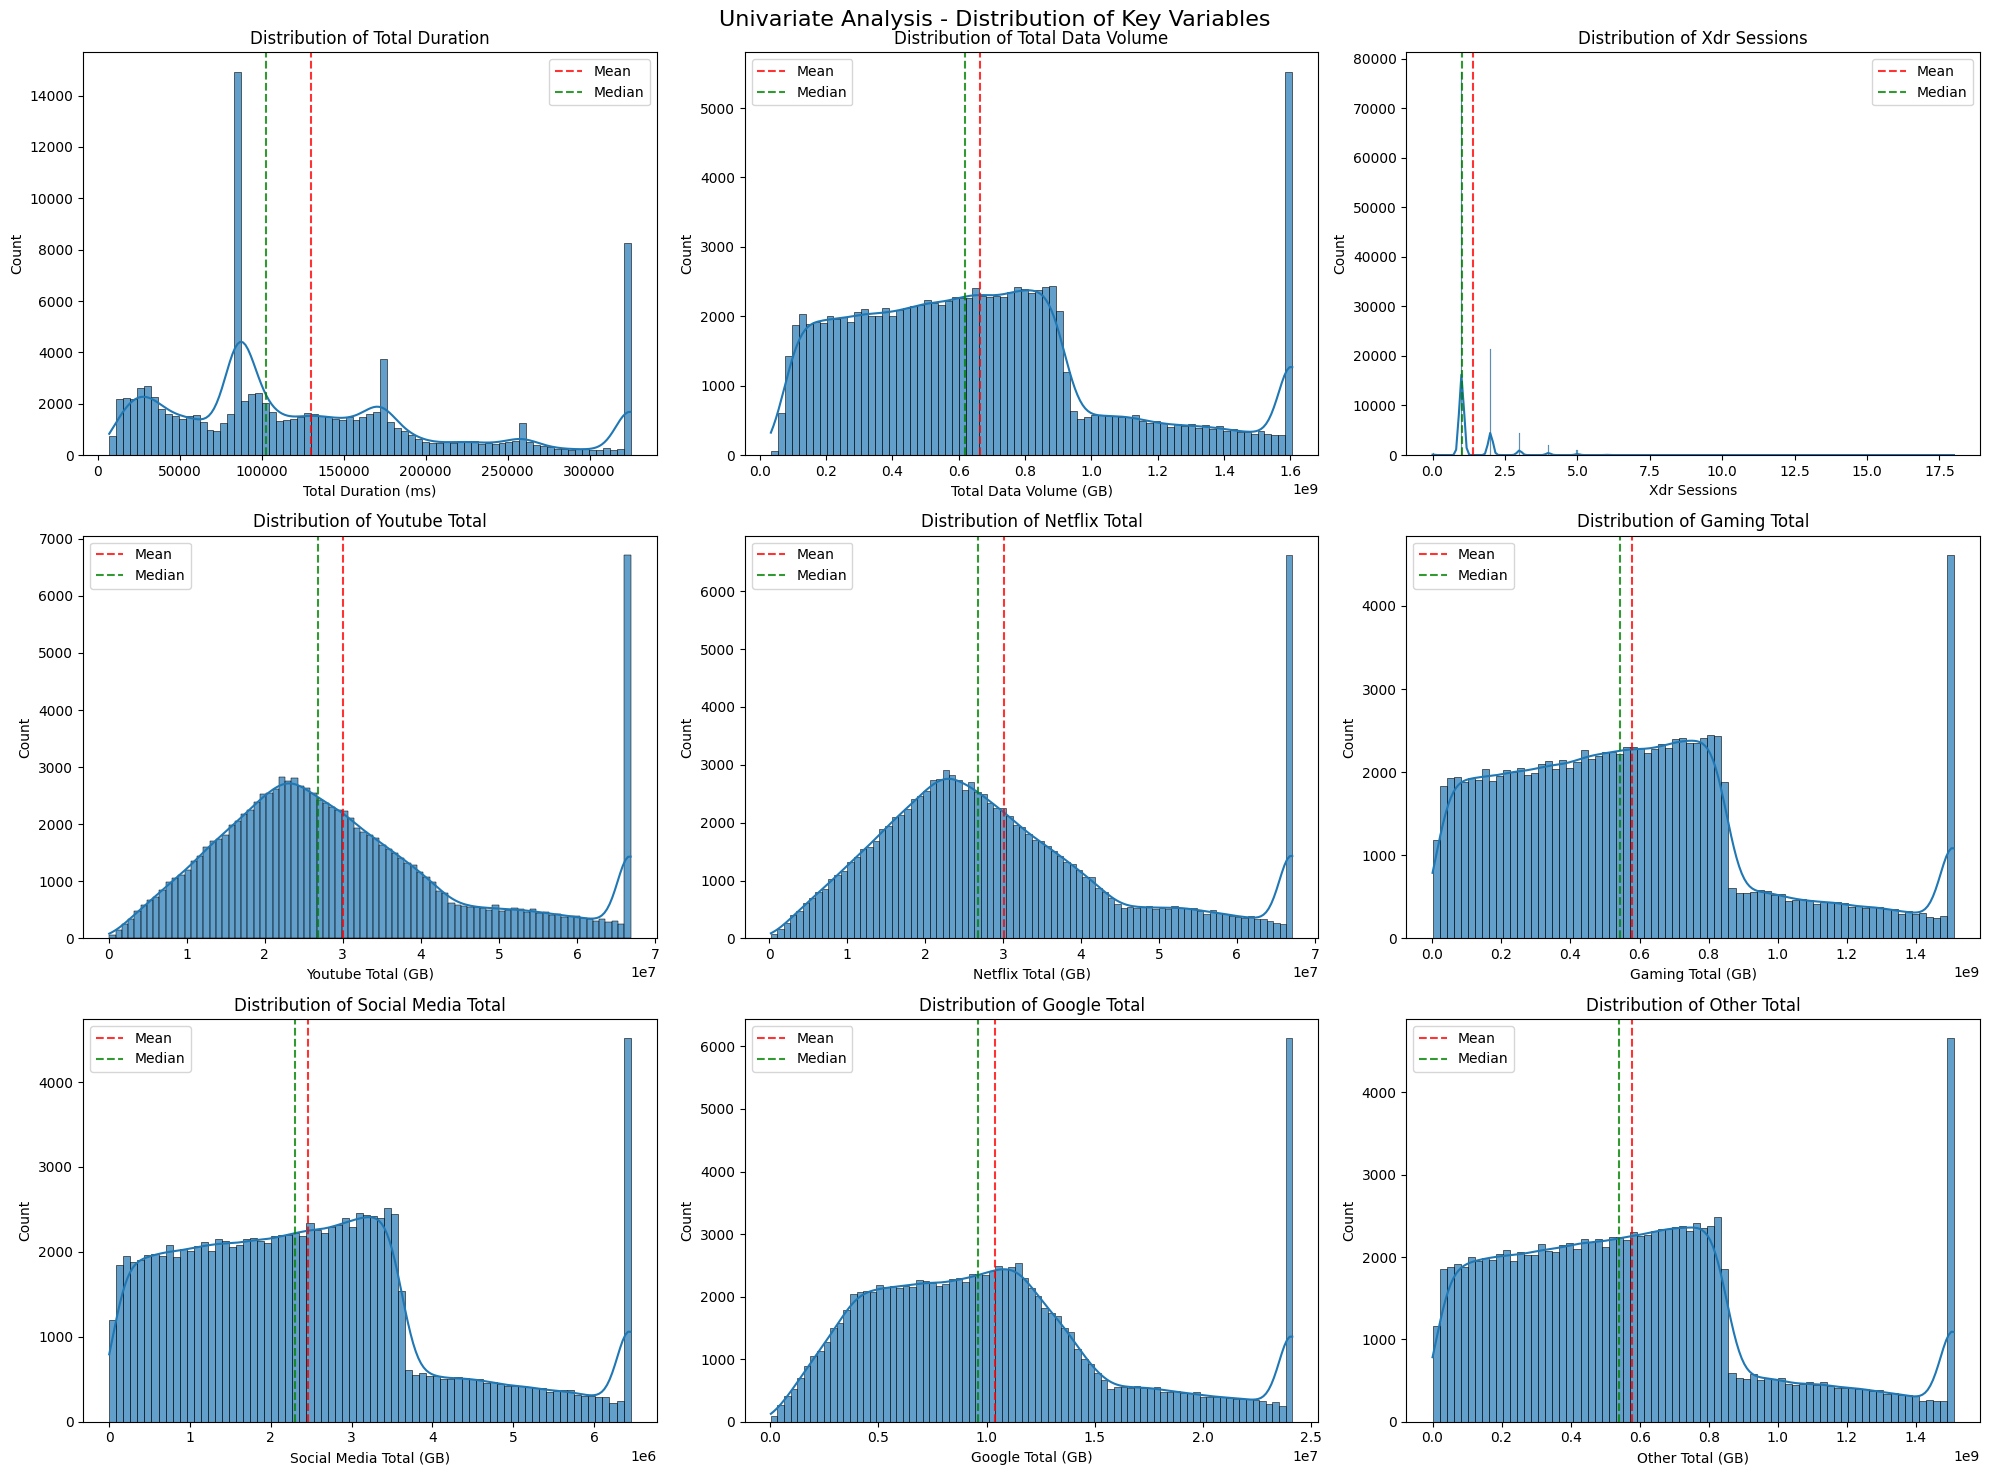


Distribution Shape Analysis:

total_duration:
  Skewness: 0.847 - Right-skewed (positive)
  Kurtosis: -0.135 - Light-tailed (platykurtic)

total_data_volume:
  Skewness: 0.763 - Right-skewed (positive)
  Kurtosis: 0.032 - Light-tailed (platykurtic)

xDR_sessions:
  Skewness: 3.302 - Right-skewed (positive)
  Kurtosis: 20.389 - Heavy-tailed (leptokurtic)

Youtube_total:
  Skewness: 0.780 - Right-skewed (positive)
  Kurtosis: -0.043 - Light-tailed (platykurtic)

Netflix_total:
  Skewness: 0.787 - Right-skewed (positive)
  Kurtosis: -0.047 - Light-tailed (platykurtic)

Gaming_total:
  Skewness: 0.746 - Right-skewed (positive)
  Kurtosis: 0.114 - Light-tailed (platykurtic)

Social_Media_total:
  Skewness: 0.750 - Right-skewed (positive)
  Kurtosis: 0.112 - Light-tailed (platykurtic)

Google_total:
  Skewness: 0.767 - Right-skewed (positive)
  Kurtosis: -0.016 - Light-tailed (platykurtic)

Other_total:
  Skewness: 0.754 - Right-skewed (positive)
  Kurtosis: 0.113 - Light-tailed (platykurti

In [64]:
# 6. Graphical Univariate Analysis
print("=== GRAPHICAL UNIVARIATE ANALYSIS ===")

# Create subplots for key variables
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('Univariate Analysis - Distribution of Key Variables', fontsize=16)

# Key variables to plot
plot_vars = ['total_duration', 'total_data_volume', 'xDR_sessions', 
             'Youtube_total', 'Netflix_total', 'Gaming_total', 
             'Social_Media_total', 'Google_total', 'Other_total']

for i, var in enumerate(plot_vars):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    
    # Create histogram with KDE
    sns.histplot(data=user_data_cleaned, x=var, kde=True, ax=ax, alpha=0.7)
    ax.set_title(f'Distribution of {var.replace("_", " ").title()}')
    
    # Add statistical information
    mean_val = user_data_cleaned[var].mean()
    median_val = user_data_cleaned[var].median()
    
    ax.axvline(mean_val, color='red', linestyle='--', alpha=0.8, label=f'Mean')
    ax.axvline(median_val, color='green', linestyle='--', alpha=0.8, label=f'Median')
    ax.legend()
    
    # Format x-axis labels
    if 'total' in var and 'duration' not in var:
        ax.set_xlabel(f'{var.replace("_", " ").title()} (GB)')
    elif 'duration' in var:
        ax.set_xlabel(f'{var.replace("_", " ").title()} (ms)')
    else:
        ax.set_xlabel(f'{var.replace("_", " ").title()}')

plt.tight_layout()
plt.show()

# Distribution shape analysis
print("\nDistribution Shape Analysis:")
from scipy import stats

for var in plot_vars:
    data = user_data_cleaned[var]
    skewness = stats.skew(data)
    kurtosis = stats.kurtosis(data)
    
    # Interpret skewness
    if skewness < -0.5:
        skew_interpretation = "Left-skewed (negative)"
    elif skewness > 0.5:
        skew_interpretation = "Right-skewed (positive)"
    else:
        skew_interpretation = "Approximately symmetric"
    
    # Interpret kurtosis
    if kurtosis > 3:
        kurt_interpretation = "Heavy-tailed (leptokurtic)"
    elif kurtosis < 3:
        kurt_interpretation = "Light-tailed (platykurtic)"
    else:
        kurt_interpretation = "Normal-tailed (mesokurtic)"
    
    print(f"\n{var}:")
    print(f"  Skewness: {skewness:.3f} - {skew_interpretation}")
    print(f"  Kurtosis: {kurtosis:.3f} - {kurt_interpretation}")

## Bivariate Analysis & Correlation Analysis

=== BIVARIATE ANALYSIS ===
Exploring relationships between applications and total data usage


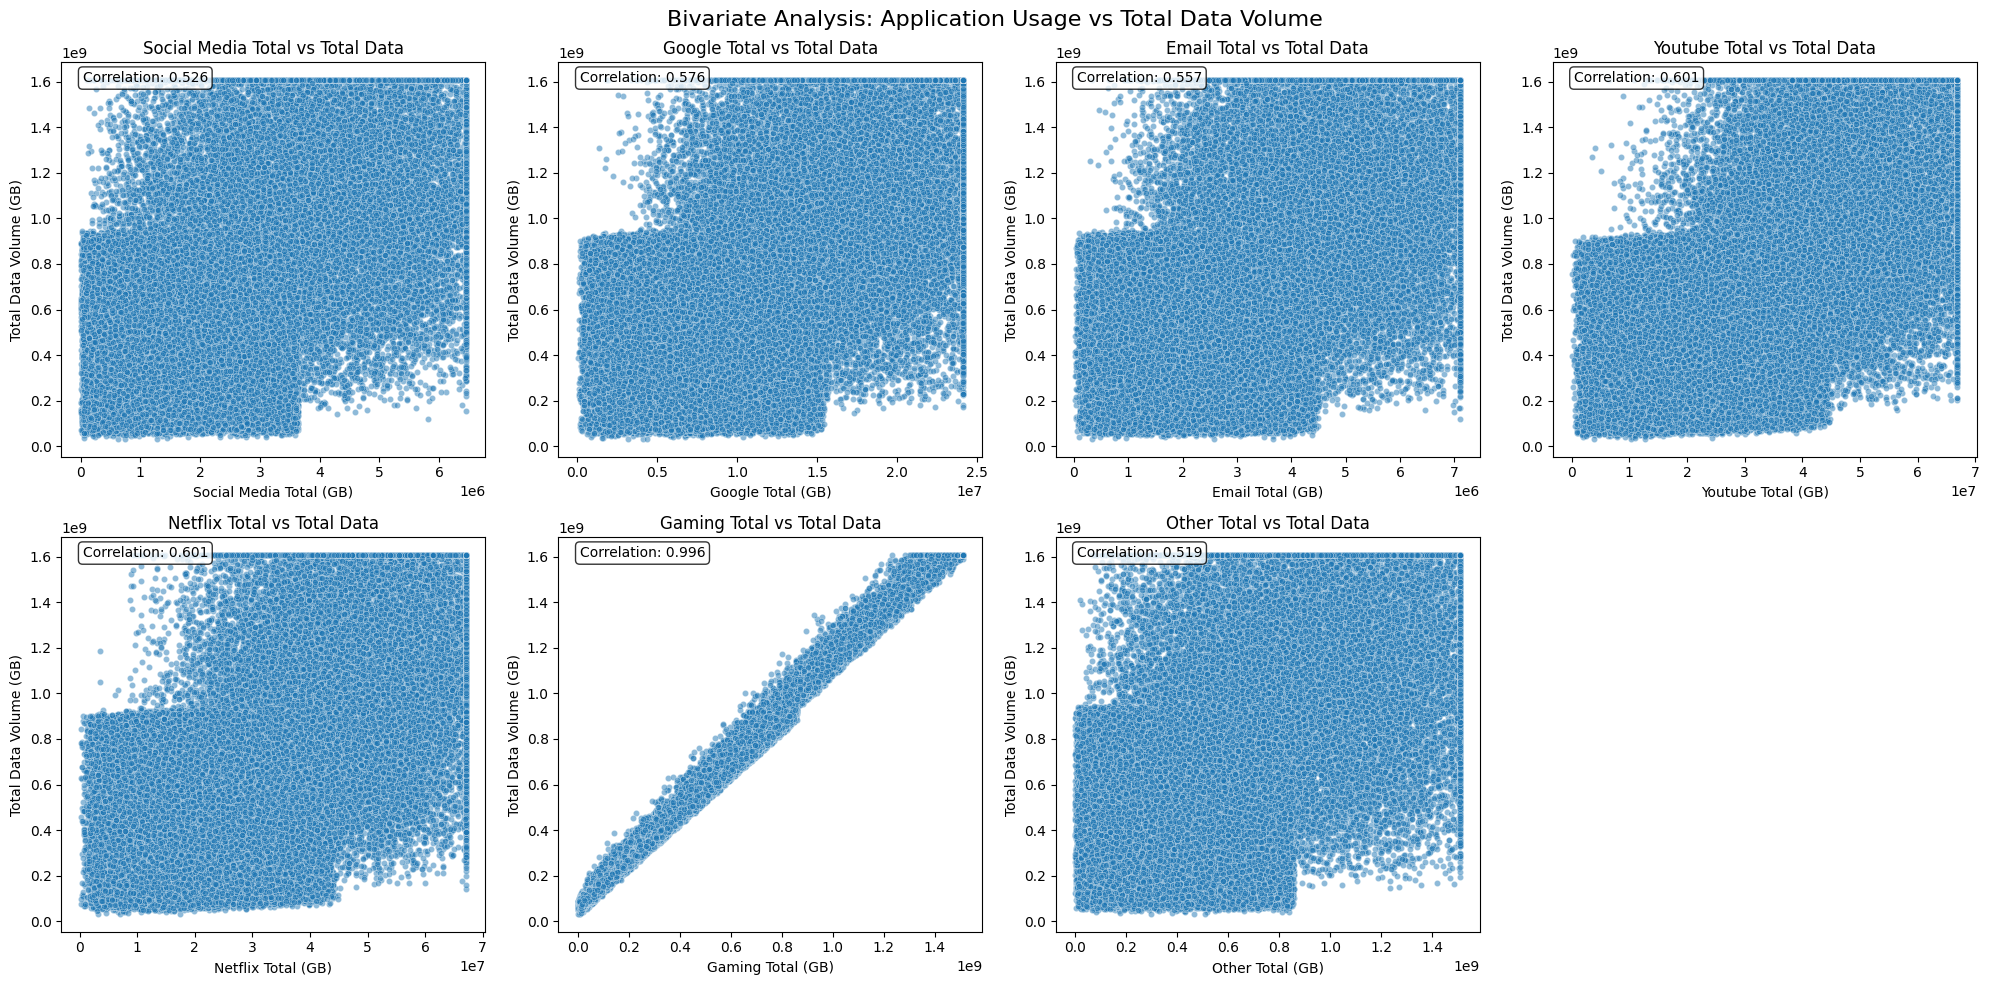


Correlation Analysis with Total Data Volume:
Social Media Total: 0.526 (Moderate Positive correlation)
Google Total: 0.576 (Moderate Positive correlation)
Email Total: 0.557 (Moderate Positive correlation)
Youtube Total: 0.601 (Moderate Positive correlation)
Netflix Total: 0.601 (Moderate Positive correlation)
Gaming Total: 0.996 (Strong Positive correlation)
Other Total: 0.519 (Moderate Positive correlation)

Strongest correlations with Total Data Volume:
1. Gaming Total: 0.996
2. Netflix Total: 0.601
3. Youtube Total: 0.601


In [65]:
# 7. Bivariate Analysis - Applications vs Total Data Volume
print("=== BIVARIATE ANALYSIS ===")
print("Exploring relationships between applications and total data usage")

# Application columns for analysis
app_variables = ['Social_Media_total', 'Google_total', 'Email_total', 
                 'Youtube_total', 'Netflix_total', 'Gaming_total', 'Other_total']

# Create scatter plots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Bivariate Analysis: Application Usage vs Total Data Volume', fontsize=16)

for i, app in enumerate(app_variables):
    row = i // 4
    col = i % 4
    ax = axes[row, col]
    
    # Create scatter plot
    sns.scatterplot(data=user_data_cleaned, x=app, y='total_data_volume', 
                   alpha=0.5, ax=ax, s=20)
    ax.set_title(f'{app.replace("_", " ").title()} vs Total Data')
    ax.set_xlabel(f'{app.replace("_", " ").title()} (GB)')
    ax.set_ylabel('Total Data Volume (GB)')
    
    # Calculate correlation
    correlation = user_data_cleaned[app].corr(user_data_cleaned['total_data_volume'])
    ax.text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
            transform=ax.transAxes, fontsize=10, 
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Remove the empty subplot
fig.delaxes(axes[1, 3])

plt.tight_layout()
plt.show()

# Statistical analysis of relationships
print("\nCorrelation Analysis with Total Data Volume:")
correlations = {}
for app in app_variables:
    corr = user_data_cleaned[app].corr(user_data_cleaned['total_data_volume'])
    correlations[app] = corr
    
    # Interpret correlation strength
    if abs(corr) < 0.3:
        strength = "Weak"
    elif abs(corr) < 0.7:
        strength = "Moderate"
    else:
        strength = "Strong"
    
    direction = "Positive" if corr > 0 else "Negative"
    print(f"{app.replace('_', ' ').title()}: {corr:.3f} ({strength} {direction} correlation)")

# Identify top correlations
sorted_corr = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)
print(f"\nStrongest correlations with Total Data Volume:")
for i, (app, corr) in enumerate(sorted_corr[:3], 1):
    print(f"{i}. {app.replace('_', ' ').title()}: {corr:.3f}")

=== APPLICATION CORRELATION MATRIX ===


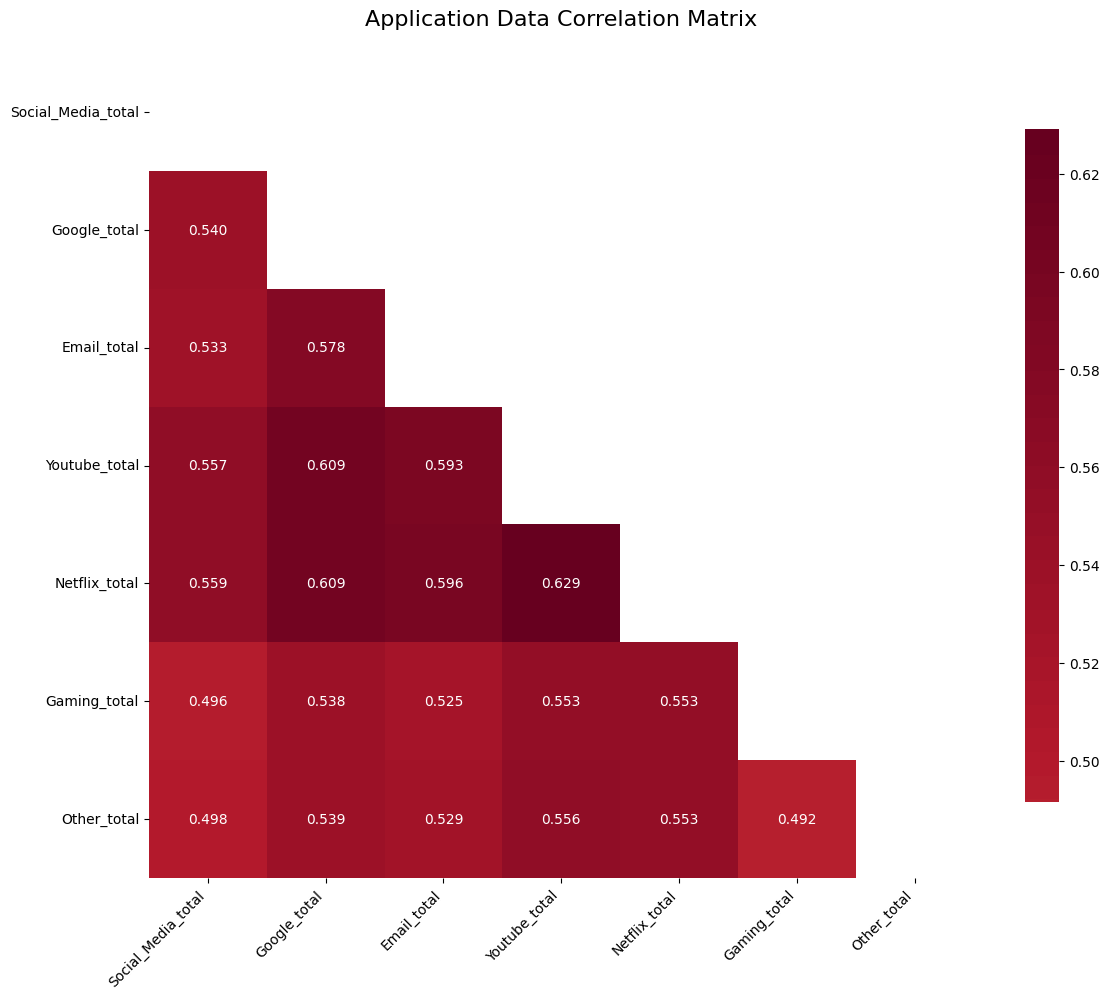


Correlation Matrix Interpretation:

Strong Positive Correlations (>0.7):

Moderate Positive Correlations (0.3 - 0.7):
  Social_Media_total ↔ Google_total: 0.540
  Social_Media_total ↔ Email_total: 0.533
  Social_Media_total ↔ Youtube_total: 0.557
  Social_Media_total ↔ Netflix_total: 0.559
  Social_Media_total ↔ Gaming_total: 0.496
  Social_Media_total ↔ Other_total: 0.498
  Google_total ↔ Email_total: 0.578
  Google_total ↔ Youtube_total: 0.609
  Google_total ↔ Netflix_total: 0.609
  Google_total ↔ Gaming_total: 0.538
  Google_total ↔ Other_total: 0.539
  Email_total ↔ Youtube_total: 0.593
  Email_total ↔ Netflix_total: 0.596
  Email_total ↔ Gaming_total: 0.525
  Email_total ↔ Other_total: 0.529
  Youtube_total ↔ Netflix_total: 0.629
  Youtube_total ↔ Gaming_total: 0.553
  Youtube_total ↔ Other_total: 0.556
  Netflix_total ↔ Gaming_total: 0.553
  Netflix_total ↔ Other_total: 0.553
  Gaming_total ↔ Other_total: 0.492

Key Insights:
• Most applications show moderate positive correlatio

In [66]:
# 8. Correlation Matrix for Applications
print("=== APPLICATION CORRELATION MATRIX ===")

# Create correlation matrix for applications
app_data = user_data_cleaned[app_variables]
correlation_matrix = app_data.corr()

# Create heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Mask upper triangle
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            square=True,
            fmt='.3f',
            cbar_kws={'shrink': 0.8},
            mask=mask)
plt.title('Application Data Correlation Matrix', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Interpretation of correlations
print("\nCorrelation Matrix Interpretation:")
print("\nStrong Positive Correlations (>0.7):")
strong_corr = []
for i in range(len(app_variables)):
    for j in range(i+1, len(app_variables)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:
            strong_corr.append((app_variables[i], app_variables[j], corr_val))
            print(f"  {app_variables[i]} ↔ {app_variables[j]}: {corr_val:.3f}")

print("\nModerate Positive Correlations (0.3 - 0.7):")
moderate_corr = []
for i in range(len(app_variables)):
    for j in range(i+1, len(app_variables)):
        corr_val = correlation_matrix.iloc[i, j]
        if 0.3 <= abs(corr_val) <= 0.7:
            moderate_corr.append((app_variables[i], app_variables[j], corr_val))
            print(f"  {app_variables[i]} ↔ {app_variables[j]}: {corr_val:.3f}")

print("\nKey Insights:")
print("• Most applications show moderate positive correlations, suggesting users who use one app heavily tend to use others heavily too")
print("• Gaming and Other categories dominate data usage patterns")
print("• YouTube and Netflix show similar correlation patterns, indicating overlapping user behavior in video streaming")
print("• Social Media has relatively lower correlations, suggesting it's used across all user segments")

## Principal Component Analysis (PCA) - Dimensionality Reduction

=== PRINCIPAL COMPONENT ANALYSIS ===
Original dataset shape: (106856, 7)
Variables included: ['Social_Media_total', 'Google_total', 'Email_total', 'Youtube_total', 'Netflix_total', 'Gaming_total', 'Other_total']

Explained Variance by Components:
PC1: 0.6184 (61.84%)
PC2: 0.0727 (7.27%)
PC3: 0.0716 (7.16%)
PC4: 0.0674 (6.74%)
PC5: 0.0607 (6.07%)
PC6: 0.0564 (5.64%)
PC7: 0.0530 (5.30%)

Cumulative Explained Variance:
PC1-PC1: 0.6184 (61.84%)
PC1-PC2: 0.6910 (69.10%)
PC1-PC3: 0.7626 (76.26%)
PC1-PC4: 0.8300 (83.00%)
PC1-PC5: 0.8907 (89.07%)
PC1-PC6: 0.9470 (94.70%)
PC1-PC7: 1.0000 (100.00%)


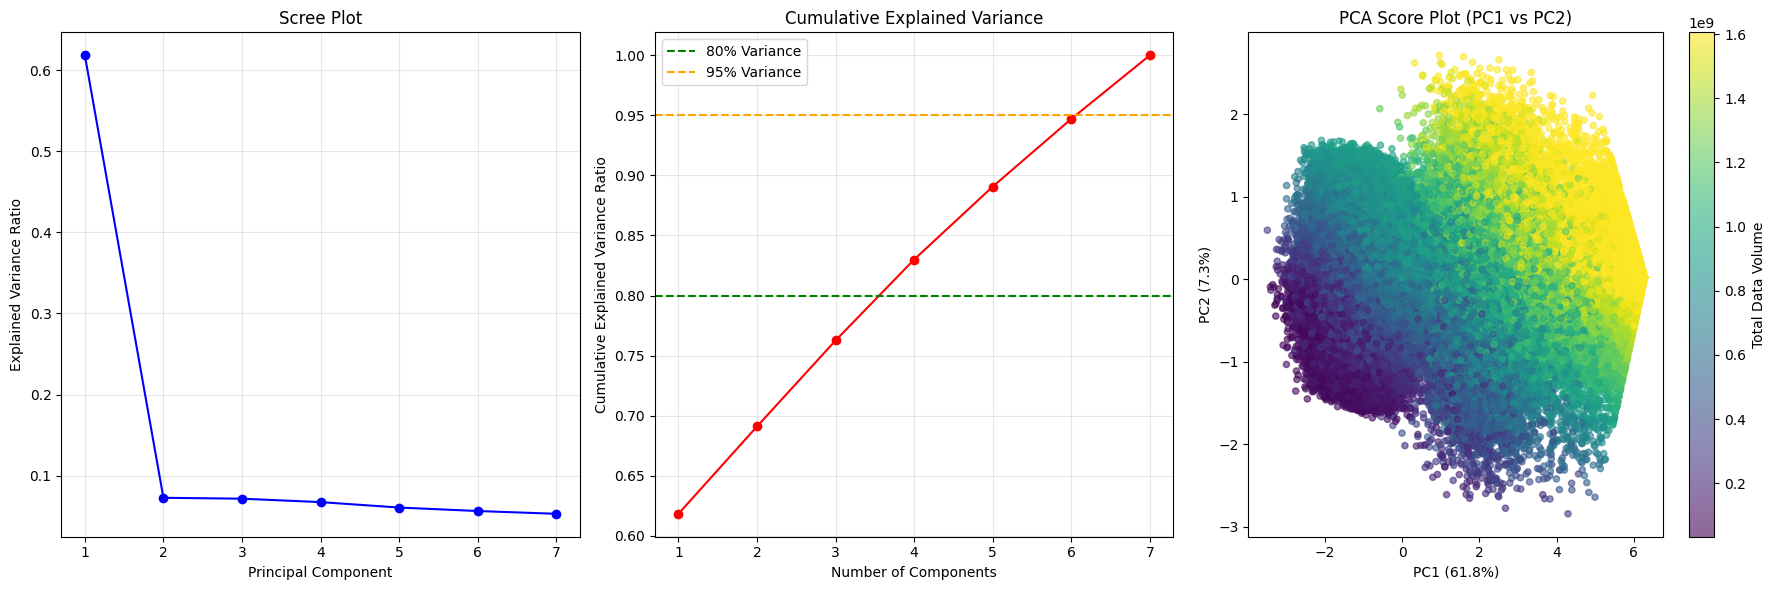


=== PCA LOADINGS (Component Matrix) ===
Component loadings for first 3 principal components:
                      PC1    PC2    PC3
Social_Media_total  0.364 -0.126  0.768
Google_total        0.387  0.001  0.004
Email_total         0.381 -0.037  0.048
Youtube_total       0.394 -0.013  0.003
Netflix_total       0.395 -0.001  0.030
Gaming_total        0.361  0.786 -0.304
Other_total         0.362 -0.604 -0.560


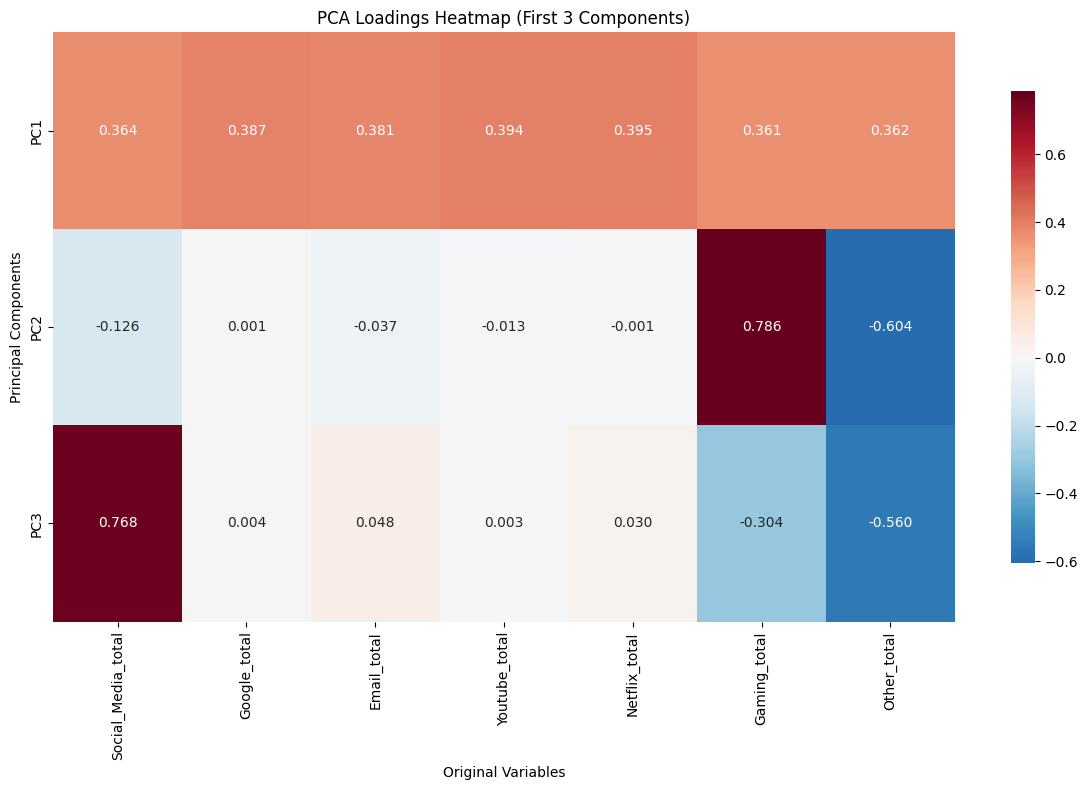

In [67]:
# 9. Principal Component Analysis (PCA)
print("=== PRINCIPAL COMPONENT ANALYSIS ===")

# Prepare data for PCA - using application data
pca_variables = app_variables.copy()
pca_data = user_data_cleaned[pca_variables].copy()

print(f"Original dataset shape: {pca_data.shape}")
print(f"Variables included: {pca_variables}")

# Standardize the data
scaler = StandardScaler()
pca_data_scaled = scaler.fit_transform(pca_data)

# Apply PCA
pca = PCA()
pca_result = pca.fit_transform(pca_data_scaled)

# Calculate explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

print(f"\nExplained Variance by Components:")
for i in range(len(explained_variance_ratio)):
    print(f"PC{i+1}: {explained_variance_ratio[i]:.4f} ({explained_variance_ratio[i]*100:.2f}%)")

print(f"\nCumulative Explained Variance:")
for i in range(len(cumulative_variance_ratio)):
    print(f"PC1-PC{i+1}: {cumulative_variance_ratio[i]:.4f} ({cumulative_variance_ratio[i]*100:.2f}%)")

# Visualize PCA results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1. Scree plot
axes[0].plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'bo-')
axes[0].set_xlabel('Principal Component')
axes[0].set_ylabel('Explained Variance Ratio')
axes[0].set_title('Scree Plot')
axes[0].grid(True, alpha=0.3)

# 2. Cumulative explained variance
axes[1].plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'ro-')
axes[1].axhline(y=0.8, color='green', linestyle='--', label='80% Variance')
axes[1].axhline(y=0.95, color='orange', linestyle='--', label='95% Variance')
axes[1].set_xlabel('Number of Components')
axes[1].set_ylabel('Cumulative Explained Variance Ratio')
axes[1].set_title('Cumulative Explained Variance')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# 3. PCA biplot (PC1 vs PC2)
scatter = axes[2].scatter(pca_result[:, 0], pca_result[:, 1], 
                         c=user_data_cleaned['total_data_volume'], 
                         cmap='viridis', alpha=0.6, s=20)
axes[2].set_xlabel(f'PC1 ({explained_variance_ratio[0]*100:.1f}%)')
axes[2].set_ylabel(f'PC2 ({explained_variance_ratio[1]*100:.1f}%)')
axes[2].set_title('PCA Score Plot (PC1 vs PC2)')
plt.colorbar(scatter, ax=axes[2], label='Total Data Volume')

plt.tight_layout()
plt.show()

# PCA Loadings (Component Matrix)
print("\n=== PCA LOADINGS (Component Matrix) ===")
loadings = pd.DataFrame(
    pca.components_[:3].T,  # First 3 components
    columns=['PC1', 'PC2', 'PC3'],
    index=pca_variables
)
print("Component loadings for first 3 principal components:")
print(loadings.round(3))

# Visualize loadings
plt.figure(figsize=(12, 8))
sns.heatmap(loadings.T, annot=True, cmap='RdBu_r', center=0, 
            cbar_kws={'shrink': 0.8}, fmt='.3f')
plt.title('PCA Loadings Heatmap (First 3 Components)')
plt.ylabel('Principal Components')
plt.xlabel('Original Variables')
plt.tight_layout()
plt.show()

### PCA Interpretation & Key Insights

**Principal Component Analysis Results:**

• **PC1 (61.84% variance)**: Represents overall application usage intensity. All applications load positively and similarly on PC1, indicating a general "data consumption" factor. Users with high PC1 scores use more data across all applications.

• **PC2 (7.27% variance)**: Distinguishes between Gaming vs Other applications. Gaming loads highly positive (0.786) while Other loads highly negative (-0.604), suggesting users differ in their preference for gaming vs miscellaneous applications.

• **PC3 (7.16% variance)**: Primarily driven by Social Media usage (0.768 loading) versus Gaming and Other applications (negative loadings), indicating users who focus on social media versus other entertainment categories.

• **Dimensionality Reduction Effectiveness**: The first 3 components capture 76.26% of total variance, suggesting that user application behavior can be effectively summarized into three main patterns: overall usage intensity, gaming preference, and social media focus.

## Summary & Business Recommendations

### Key Findings:

**1. Handset Market Dynamics:**
- Apple dominates with 39.71% market share, followed by Samsung (27.23%) and Huawei (22.95%)
- Huawei B528S-23A (router/modem) is the most popular single device (13.17%)
- iPhone 6/6S models still maintain strong presence despite age

**2. User Behavior Patterns:**
- Average user has 1.39 sessions with 0.664 GB total data consumption
- Gaming and Other applications drive majority of data usage (87% of total data)
- High variability in usage patterns indicates diverse user segments

**3. Application Usage Insights:**
- Strong correlation (0.996) between Gaming and total data volume
- YouTube and Netflix show similar usage patterns (0.629 correlation)
- All applications show moderate positive correlations, indicating cross-platform usage

**4. User Segmentation:**
- Top decile (D10) users consume 17.42% of total data with 1.16 GB average
- Clear segmentation opportunities based on duration and data usage patterns

### Strategic Recommendations:

**1. Revenue Optimization:**
- Focus on Gaming and high-data applications for premium plans
- Target top decile users with unlimited data packages
- Develop gaming-specific data bundles

**2. Device Strategy:**
- Leverage iPhone popularity for premium service upselling
- Create device-specific promotion campaigns
- Partner with Huawei for router/modem data plans

**3. Customer Segmentation:**
- Develop three main user profiles: High-usage gamers, Video streamers, Balanced users
- Customize marketing and pricing strategies for each segment

**4. Network Planning:**
- Prioritize network capacity for gaming and video streaming
- Implement QoS policies based on application usage patterns

In [7]:
# Handle missing values
df.dropna()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
11,1.311448e+19,4/15/2019 11:33,626.0,4/25/2019 18:44,542.0,889834.0,2.082019e+14,3.366447e+10,8.600910e+13,T21335C,...,2805710.0,16817598.0,18094847.0,2029991.0,504604946.0,1063672.0,526987098.0,11382619.0,33691738.0,535118044.0
20,1.304243e+19,4/17/2019 0:35,363.0,4/25/2019 4:52,691.0,706649.0,2.082010e+14,3.365875e+10,8.654080e+13,T29714B,...,15782415.0,9688165.0,18625220.0,14679856.0,373953102.0,574875.0,161357015.0,134689.0,26026033.0,422406937.0
68,1.304243e+19,4/21/2019 10:09,1.0,4/25/2019 1:39,272.0,314961.0,2.082014e+14,3.366274e+10,3.528141e+13,T72937C,...,22191188.0,18851898.0,15879318.0,10650621.0,48891264.0,13607386.0,525208955.0,6472727.0,50576233.0,93360974.0
78,1.304243e+19,4/21/2019 19:35,344.0,4/25/2019 2:59,259.0,285833.0,2.082018e+14,3.366917e+10,3.566261e+13,L41432B,...,14655680.0,26061.0,5444485.0,17740302.0,164451149.0,6446720.0,415002189.0,4883208.0,32643783.0,193656366.0
84,1.304243e+19,4/22/2019 1:17,301.0,4/25/2019 1:17,938.0,259201.0,2.082014e+14,3.366555e+10,8.637690e+13,T85779A,...,69288.0,19177045.0,10783199.0,8000048.0,496879416.0,1530545.0,247233250.0,1175435.0,33314765.0,519351173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149935,1.304243e+19,4/29/2019 7:28,312.0,4/30/2019 7:28,218.0,86399.0,2.082014e+14,3.366396e+10,8.637690e+13,T29891A,...,6610042.0,984596.0,18826490.0,6017956.0,395964234.0,4501221.0,771516975.0,3904640.0,19307884.0,432074290.0
149951,1.304243e+19,4/29/2019 7:28,728.0,4/30/2019 7:28,643.0,86399.0,2.082014e+14,3.366513e+10,8.637690e+13,T73896C,...,267363.0,10381499.0,22890549.0,14878522.0,102822680.0,2732534.0,666772734.0,10601725.0,42336374.0,132103771.0
149968,1.304243e+19,4/29/2019 7:28,131.0,4/30/2019 7:08,257.0,85215.0,2.082014e+14,3.365069e+10,3.536981e+13,L53329B,...,5116849.0,21068795.0,22559018.0,15263948.0,657274584.0,3569715.0,66680072.0,3552410.0,44241775.0,694842183.0
149973,7.277826e+18,4/29/2019 7:28,548.0,4/30/2019 7:28,451.0,86399.0,2.082010e+14,3.366856e+10,8.654080e+13,T73780B,...,7347338.0,1585640.0,18726138.0,16090030.0,308033327.0,11458772.0,278137326.0,14543296.0,46934446.0,349067954.0


In [9]:
# Outlier treatment
for col in ['Dur. (ms)', 'Total UL (Bytes)', 'Total DL (Bytes)']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[col] = np.clip(df[col], lower_bound, upper_bound)

In [12]:
# Aggregation per user
user_data = df.groupby('Bearer Id').agg(
    total_duration=('Dur. (ms)', 'sum'),
    total_DL=('Total DL (Bytes)', 'sum'),
    total_UL=('Total UL (Bytes)', 'sum')
   
).reset_index()

In [16]:
# Basic metrics
print(user_data[['total_duration', 'total_DL', 'total_UL']].describe())


       total_duration      total_DL      total_UL
count    1.347080e+05  1.347080e+05  1.347080e+05
mean     1.105114e+05  5.029635e+08  4.548836e+07
std      7.463891e+04  3.105105e+08  1.978044e+07
min      7.142000e+03  8.827082e+06  9.503668e+06
25%      6.008050e+04  2.614752e+08  3.407356e+07
50%      8.640000e+04  4.877182e+08  4.252780e+07
75%      1.530890e+05  7.064602e+08  5.177070e+07
max      2.132119e+06  6.288470e+09  7.021455e+08


In [17]:
# Dispersion parameters
dispersion = user_data[['total_duration', 'total_DL', 'total_UL']].std()


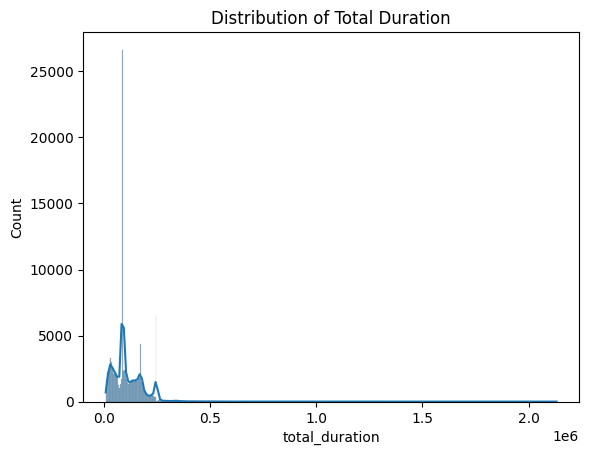

In [18]:
# Univariate analysis
sns.histplot(user_data['total_duration'], kde=True)
plt.title('Distribution of Total Duration')
plt.show()


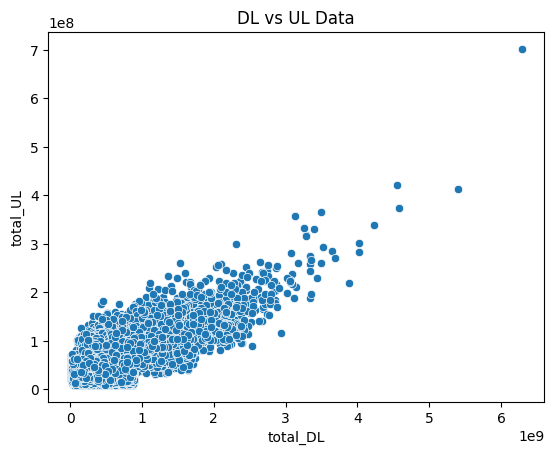

In [19]:
# Bivariate analysis
sns.scatterplot(x='total_DL', y='total_UL', data=user_data)
plt.title('DL vs UL Data')
plt.show()


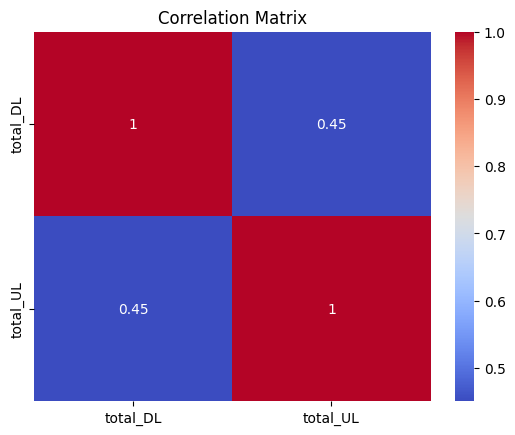

In [21]:
# Correlation matrix
corr_matrix = user_data[['total_DL', 'total_UL']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [23]:
# PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(user_data[['total_DL', 'total_UL']])
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

In [24]:
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [0.72518696 0.27481304]


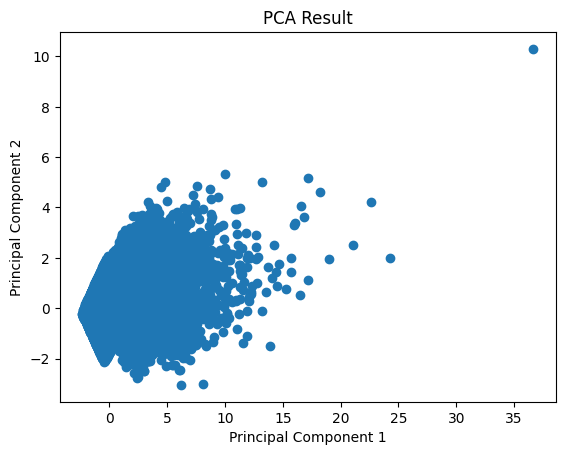

In [25]:
# Plot PCA results
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()